<a href="https://colab.research.google.com/github/PHandradee/PORTFOLIO---Projeto-House-Rocket/blob/main/Projeto_House_Rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas
---



In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=557a9e63a4a077bc024337b314963dd19cded43d869915262b42a65e0dc64453
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
# from empiricaldist import Cdf
import datetime as dt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import power_transform
import matplotlib.patches as mpatches
 
from datetime import datetime

# Carregando os dados

In [ ]:
uploaded = files.upload()  #fazendo upload do arquivo no google colab

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
df=pd.read_csv('kc_house_data.csv')

# Explorando o DataFrame

In [ ]:
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe().round(2) #o método round é para mostrar apenas 2 casas decimais


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [ ]:
#verificando existência de valores nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#mudando o nome das colunas
df.columns = ['id','data_venda','preço_venda','n_quartos','n_banheiros','m2_construida','m2_terreno','n_andares','vista_mar','vista','condicao_casa',
              'qualidade_casa','m2_construida_solo','m2_construida_baixo_solo','ano_construcao','ano_reforma','cep','lat','long','m2_construida15',
              'm2_terreno15']
df

,id,data_venda,preço_venda,n_quartos,n_banheiros,m2_construida,m2_terreno,n_andares,vista_mar,vista,condicao_casa,qualidade_casa,m2_construida_solo,m2_construida_baixo_solo,ano_construcao,ano_reforma,cep,lat,long,m2_construida15,m2_terreno15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#definindo a coluna id como index.
df=df.set_index('id')

In [ ]:
#convertendo a coluna de data para datetime
df['data_venda']= pd.to_datetime(df['data_venda'],format="%Y/%m/%d")
#df['data_venda'] = df['data_venda'].dt.strftime('%d-%m-%Y')
df

,data_venda,preço_venda,n_quartos,n_banheiros,m2_construida,m2_terreno,n_andares,vista_mar,vista,condicao_casa,qualidade_casa,m2_construida_solo,m2_construida_baixo_solo,ano_construcao,ano_reforma,cep,lat,long,m2_construida15,m2_terreno15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [ ]:
df.dtypes

data_venda                  datetime64[ns]
preço_venda                        float64
n_quartos                            int64
n_banheiros                        float64
m2_construida                        int64
m2_terreno                           int64
n_andares                          float64
vista_mar                            int64
vista                                int64
condicao_casa                        int64
qualidade_casa                       int64
m2_construida_solo                   int64
m2_construida_baixo_solo             int64
ano_construcao                       int64
ano_reforma                          int64
cep                                  int64
lat                                float64
long                               float64
m2_construida15                      int64
m2_terreno15                         int64
dtype: object

# Quais o meses que o valor é mais alto e mais baixo?

In [ ]:
df['mês'] = df['data_venda'].dt.month
df['ano'] = df['data_venda'].dt.year
df

,data_venda,preço_venda,n_quartos,n_banheiros,m2_construida,m2_terreno,n_andares,vista_mar,vista,condicao_casa,qualidade_casa,m2_construida_solo,m2_construida_baixo_solo,ano_construcao,ano_reforma,cep,lat,long,m2_construida15,m2_terreno15,mês,ano
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014


In [ ]:
media_preço_mes = df.groupby(['ano','mês'])['preço_venda'].mean()
media_preço_mes

ano   mês
2014  5      548080.276584
      6      558002.199541
      7      544788.764360
      8      536445.276804
      9      529253.821871
      10     539026.971778
      11     521961.009213
      12     524461.866757
2015  1      525870.889571
      2      507851.371200
      3      543977.187200
      4      561837.774989
      5      558126.811146
Name: preço_venda, dtype: float64

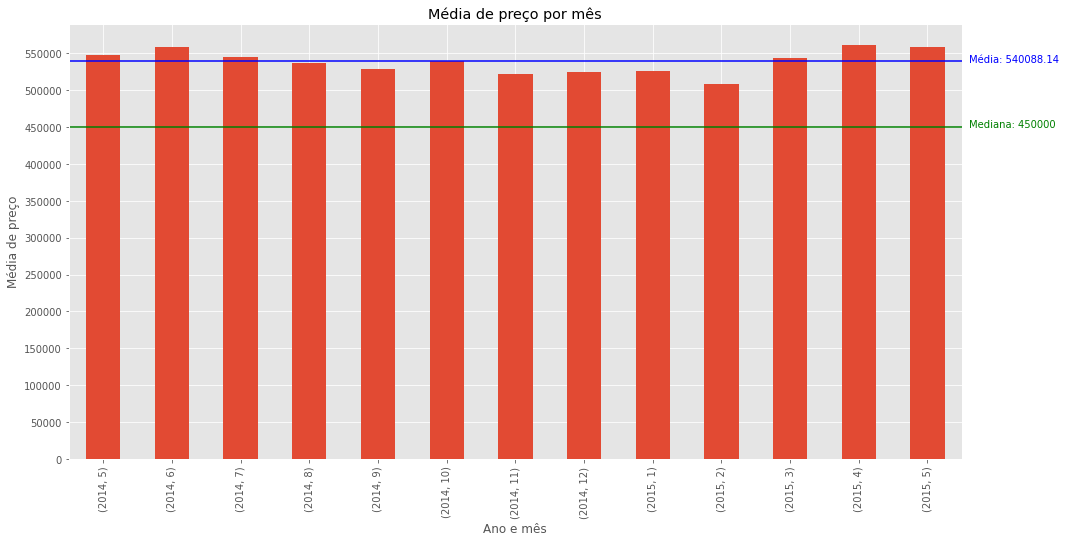

In [ ]:

plt.figure(figsize=(16,8))
plt.tight_layout()
plt.style.use('ggplot')

media_preço_mes.plot.bar()
plt.axhline(y=df['preço_venda'].mean(), color='b', linestyle='-')
plt.axhline(y=df['preço_venda'].median(), color='g', linestyle='-')
plt.yticks(range(0,600000,50000))
plt.text(x=12.6,y=538000,s='Média: 540088.14',c='b')
plt.text(x=12.6,y=450000,s='Mediana: 450000',c='g')
plt.xlabel('Ano e mês')
plt.ylabel('Média de preço')
plt.title('Média de preço por mês')

plt.show()

# Será que o preço aumenta se a venda for feita no fim de semana?


In [ ]:
#vamos colocar o dia da semana
df['dia_da_semana'] = df['data_venda'].dt.weekday

In [ ]:
df['dia_da_semana'].unique()

array([0, 1, 2, 4, 3, 5, 6])

In [ ]:
df['dia_da_semana'].replace([0,1,2,3,4],'Semana',inplace =True)
df['dia_da_semana'].replace([5,6],['Sábado','Domingo'],inplace=True)


In [ ]:
df

,data_venda,preço_venda,n_quartos,n_banheiros,m2_construida,m2_terreno,n_andares,vista_mar,vista,condicao_casa,qualidade_casa,m2_construida_solo,m2_construida_baixo_solo,ano_construcao,ano_reforma,cep,lat,long,m2_construida15,m2_terreno15,mês,ano,dia_da_semana
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,Semana
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,Semana
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,Semana
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,Semana
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,Semana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014,Semana
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015,Semana
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014,Semana


In [ ]:
def filtro_data(data_inicial,data_final,dados):
  data1 = dados[dados['data_venda'] >= data_inicial].sort_values(by='data_venda')
  data_final=data1[data1['data_venda'] <= data_final]
  return data_final

In [ ]:
#meses de baixa
data_2014_11 = df[(df['data_venda'] >= '2014-11-01') & (df['data_venda'] <= '2014-11-30')].sort_values(by='data_venda')
data_2014_12 = filtro_data('2014-12-01','2014-12-31',df)
data_2015_01 = filtro_data('2015-01-01','2015-01-30',df)
data_2015_02 = filtro_data('2015-02-01','2015-02-28',df)
 
#meses de alta
data_2015_04 = filtro_data('2015-04-01','2015-04-30',df)
data_2015_05 = filtro_data('2015-05-01','2015-05-31',df)
data_2014_05 = filtro_data('2014-05-01','2014-05-31',df)
data_2014_06 = filtro_data('2014-06-01','2014-06-30',df)

In [ ]:
media_preço_dia = data_2014_11.groupby(['data_venda','dia_da_semana'])['preço_venda'].mean()

In [ ]:
media_preço_dia

data_venda  dia_da_semana
2014-11-01  Sábado            699300.000000
2014-11-02  Domingo           825000.000000
2014-11-03  Semana            466600.684932
2014-11-04  Semana            444583.410959
2014-11-05  Semana            503388.376623
2014-11-06  Semana            528817.961538
2014-11-07  Semana            509309.662162
2014-11-08  Sábado            601799.800000
2014-11-09  Domingo           442000.000000
2014-11-10  Semana            556414.197531
2014-11-11  Semana            573006.200000
2014-11-12  Semana            528651.865854
2014-11-13  Semana            485419.470000
2014-11-14  Semana            560762.318841
2014-11-15  Sábado            771250.000000
2014-11-16  Domingo           329129.333333
2014-11-17  Semana            477905.964286
2014-11-18  Semana            520834.850575
2014-11-19  Semana            512247.048780
2014-11-20  Semana            535647.906977
2014-11-21  Semana            544095.280488
2014-11-22  Sábado            541450.000000
2014-1

In [ ]:
#meses de baixa
data_2014_11['data_venda'] = data_2014_11['data_venda'].dt.strftime('%d-%m-%Y')
data_2014_12['data_venda'] = data_2014_12['data_venda'].dt.strftime('%d-%m-%Y')
data_2015_01['data_venda'] = data_2015_01['data_venda'].dt.strftime('%d-%m-%Y')
data_2015_02['data_venda'] = data_2015_02['data_venda'].dt.strftime('%d-%m-%Y')

In [ ]:
#meses de alta
data_2015_04['data_venda'] = data_2015_04['data_venda'].dt.strftime('%d-%m-%Y')
data_2015_05['data_venda'] = data_2015_05['data_venda'].dt.strftime('%d-%m-%Y')
data_2014_05['data_venda'] = data_2014_05['data_venda'].dt.strftime('%d-%m-%Y')
data_2014_06['data_venda'] = data_2014_06['data_venda'].dt.strftime('%d-%m-%Y')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


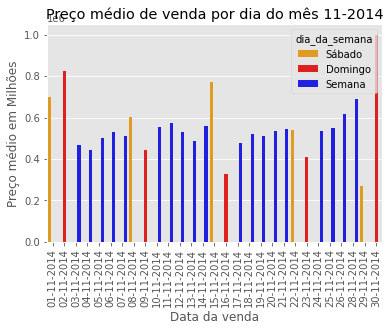

In [ ]:
cores = {'Semana':'blue','Sábado':'orange','Domingo':'red'}
sns.barplot('data_venda','preço_venda',data=data_2014_11,ci=None,color='r',hue='dia_da_semana',palette=cores)
plt.title('Preço médio de venda por dia do mês 11-2014')
plt.xlabel('Data da venda')
plt.ylabel('Preço médio em Milhões')
plt.xticks(rotation=90)

#plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

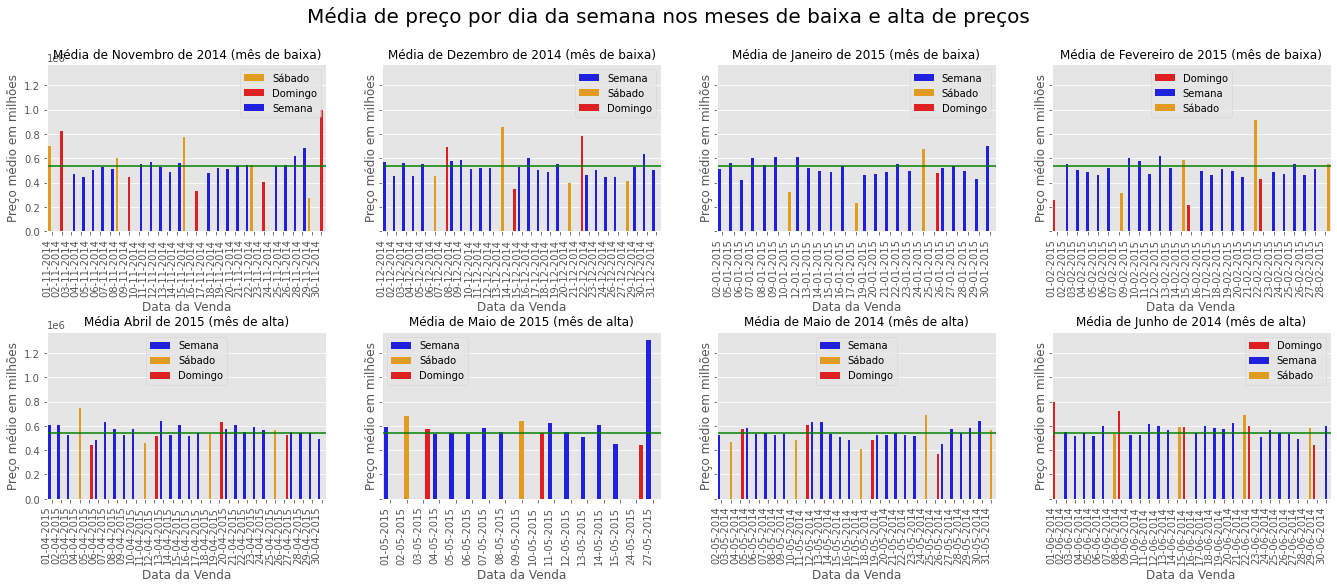

In [ ]:
fig,axes = plt.subplots(2,4,figsize=(23,8),sharey=True)
fig.suptitle('Média de preço por dia da semana nos meses de baixa e alta de preços',fontsize=20)

a = sns.barplot('data_venda','preço_venda',data=data_2014_11,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[0,0])
a.set_xticklabels(a.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[0,0].set_xlabel('Data da Venda')
axes[0,0].set_ylabel('Preço médio em milhões')
axes[0,0].set_title('Média de Novembro de 2014 (mês de baixa)',size=12)
axes[0,0].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[0,0].legend()

b = sns.barplot('data_venda','preço_venda',data=data_2014_12,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[0,1])
b.set_xticklabels(b.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[0,1].set_xlabel('Data da Venda')
axes[0,1].set_ylabel('Preço médio em milhões')
axes[0,1].set_title('Média de Dezembro de 2014 (mês de baixa)',size=12)
axes[0,1].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[0,1].legend()

c = sns.barplot('data_venda','preço_venda',data=data_2015_01,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[0,2])
c.set_xticklabels(c.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[0,2].set_xlabel('Data da Venda')
axes[0,2].set_ylabel('Preço médio em milhões')
axes[0,2].set_title('Média de Janeiro de 2015 (mês de baixa)',size=12)
axes[0,2].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[0,2].legend()

d = sns.barplot('data_venda','preço_venda',data=data_2015_02,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[0,3])
d.set_xticklabels(d.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[0,3].set_xlabel('Data da Venda')
axes[0,3].set_ylabel('Preço médio em milhões')
axes[0,3].set_title('Média de Fevereiro de 2015 (mês de baixa)',size=12)
axes[0,3].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[0,3].legend()


e = sns.barplot('data_venda','preço_venda',data=data_2015_04,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[1,0])
e.set_xticklabels(e.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[1,0].set_xlabel('Data da Venda')
axes[1,0].set_ylabel('Preço médio em milhões')
axes[1,0].set_title('Média Abril de 2015 (mês de alta)',size=12)
axes[1,0].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[1,0].legend()

f = sns.barplot('data_venda','preço_venda',data=data_2015_05,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[1,1])
f.set_xticklabels(f.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[1,1].set_xlabel('Data da Venda')
axes[1,1].set_ylabel('Preço médio em milhões')
axes[1,1].set_title('Média de Maio de 2015 (mês de alta)',size=12)
axes[1,1].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[1,1].legend()

g = sns.barplot('data_venda','preço_venda',data=data_2014_05,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[1,2])
g.set_xticklabels(g.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[1,2].set_xlabel('Data da Venda')
axes[1,2].set_ylabel('Preço médio em milhões')
axes[1,2].set_title('Média de Maio de 2014 (mês de alta)',size=12)
axes[1,2].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[1,2].legend()

h = sns.barplot('data_venda','preço_venda',data=data_2014_06,ci=None,color='r',hue='dia_da_semana',palette=cores,ax=axes[1,3])
h.set_xticklabels(h.get_xticklabels(),rotation=90,horizontalalignment='right')
axes[1,3].set_xlabel('Data da Venda')
axes[1,3].set_ylabel('Preço médio em milhões')
axes[1,3].set_title('Média de Junho de 2014 (mês de alta)',size=12)
axes[1,3].axhline(y=df['preço_venda'].mean(), color='g', linestyle='-')
axes[1,3].legend()

plt.subplots_adjust(hspace=0.6)


In [ ]:
semana = df[df['dia_da_semana'] == 'Semana']
fds = df[(df['dia_da_semana'] == 'Sábado') | (df['dia_da_semana'] == 'Domingo')]
diferença = semana['preço_venda'].mean() - fds['preço_venda'].mean()
porcentagem = diferença/fds['preço_venda'].mean()*100
print(f'Dias de semana tem o preço médio variando {porcentagem:.02f}% em comparação com o fim de semana')

Dias de semana tem o preço médio variando -2.31% em comparação com o fim de semana


#Qual mês se vende mais?

In [ ]:
quantidade_venda_mes = df.groupby(['ano','mês'])['preço_venda'].count()
quantidade_venda_mes

ano   mês
2014  5      1768
      6      2180
      7      2211
      8      1940
      9      1774
      10     1878
      11     1411
      12     1471
2015  1       978
      2      1250
      3      1875
      4      2231
      5       646
Name: preço_venda, dtype: int64

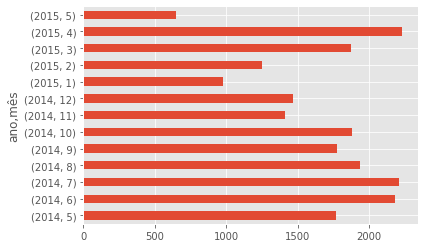

In [ ]:
quantidade_venda_mes.plot.barh()


#Qual dia se vende mais?

#Se vende mais de fim de semana?

In [ ]:
quantidade_venda_dsemana = df.groupby(['ano','dia_da_semana'])['preço_venda'].count()
quantidade_venda_dsemana

ano   dia_da_semana
2014  0                2865
      1                3248
      2                3048
      3                2694
      4                2454
      5                 186
      6                 138
2015  0                1234
      1                1467
      2                1555
      3                1300
      4                1231
      5                 101
      6                  92
Name: preço_venda, dtype: int64

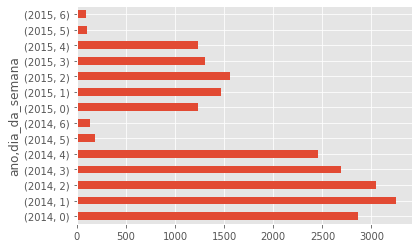

In [ ]:
quantidade_venda_dsemana.plot.barh()

#Significado de cada Coluna

- id = id único de venda da casa
-date= data da venda da casa
-price = preço de venda
-bedrooms = número de quartos
-bathrooms = número de banheiros, onde .5 representa um banheiro apenas com privada
-Sqft_living = metros quadrados área construída
-Sqft_lot = metros quadrados do terreno
-floors = numero de andares
-waterfront = vista para o mar
-view = vista de 0 a 4 representando o quão boa é a vista
-condition = condição da casa de 1 a 5 (onde 5 é o melhor)
-Grade = qualidade da casa, vai de 1 a 13, onde 1-3 baixa qualidade de
construção e design, 7 é média e de 11-13 alta qualidade.
-Sqft_above = metros quadrados área construída no nível do solo
-Sqft_basement = metros quadrados área construída abaixo do nível do solo
-Yr_built = ano de construção da casa
-Yr_renovated = ano da última reforma
-Zipcode = Cep
-Lat= Latitude
-Long = Longitude
-Sqft_living15 = metros quadrados de área construída dos 15 vizinhos
mais próximos.
-Sqft_lot15= metros quadrados do terreno dos 15 vizinhos mais proximos.

#Extra

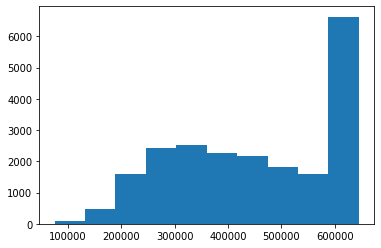

In [ ]:
preço_venda_slice = df[df['preço_venda'] <= 645000]
#plt.figure(figsize=(30,5))
plt.hist(df['preço_venda'])

plt.show()
#Aqui percebemos que a distribuição dos dados de preço não segue um padrão normal
# sendo assim para podermos fazer os testes de hipótese e aumentar a confiabilidade
# da nossa análise, irei aproximar esta distribuição de uma normal através de Box-Cox

In [ ]:
df_1 = boxcox(df['preço_venda'])
df_1

(array([4.0334758 , 4.07834265, 4.02144527, ..., 4.06460556, 4.06434971,
        4.05395248]), -0.23401853749997595)

In [ ]:
array=np.array(df['preço_venda'])
array = array.reshape(-1,1)
df_2 = power_transform(array,method='box-cox')

In [ ]:
#utilizar método dos desvios padrão
quartil_superior = df['preço_venda'].mean() + 3* df['preço_venda'].std()
quartil_inferior = df['preço_venda'].mean() - 3* df['preço_venda'].std()
print('O intervalo de preços que serão substituidos estão entre ',quartil_inferior,' e ',quartil_superior,'.')
df['preço_venda'] = np.where(df['preço_venda']> 645000,np.random.randint(400000,600000,1),df['preço_venda'])


O intervalo de preços que serão substituidos estão entre  -561293.4476815696  e  1641469.7312146286 .
